In [45]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline
import seaborn as sns


In [2]:
os.getcwd()
os.chdir('D:\Data')
Food_ds=pd.read_csv("indian_food.csv")
Food_ds.head(10)
#Food_ds.info
Food_ds.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,255,255,Paniyaram,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ingredients,255,252,"Chhena, sugar, ghee",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diet,255,2,vegetarian,226,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prep_time,255,NaN,NaN,NaN,31.1059,72.5544,-1,10,10,20,500
cook_time,255,NaN,NaN,NaN,34.5294,48.2656,-1,20,30,40,720
flavor_profile,255,5,spicy,133,NaN,NaN,NaN,NaN,NaN,NaN,NaN
course,255,4,main course,129,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,255,25,Gujarat,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,254,7,West,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
Food_ds.isnull().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

In [4]:
##summary
Food_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [5]:
Food_ds['region'].unique()

array(['East', 'West', 'North', '-1', 'North East', 'South', 'Central',
       nan], dtype=object)

In [6]:
a = pd.isnull(Food_ds['region'])
Food_ds[a]

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
110,Panjeeri,"Whole wheat flour, musk melon seeds, poppy see...",vegetarian,10,25,sweet,dessert,Uttar Pradesh,NaN


In [7]:
Food_ds['region'] = Food_ds.region.replace(np.NaN, 'North')

In [8]:
#null values.
Food_ds.isnull().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            0
dtype: int64

In [9]:
Food_ds['state'].value_counts()

Gujarat            35
Punjab             32
Maharashtra        30
West Bengal        24
-1                 24
Assam              21
Tamil Nadu         20
Andhra Pradesh     10
Uttar Pradesh       9
Kerala              8
Odisha              7
Karnataka           6
Rajasthan           6
Telangana           5
Goa                 3
Bihar               3
Jammu & Kashmir     2
Madhya Pradesh      2
Manipur             2
Chhattisgarh        1
Tripura             1
NCT of Delhi        1
Uttarakhand         1
Haryana             1
Nagaland            1
Name: state, dtype: int64

In [10]:
st=Food_ds[Food_ds['state']=='-1']
st.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
7,Kaju katli,"Cashews, ghee, cardamom, sugar",vegetarian,10,20,sweet,dessert,-1,-1
9,Kheer,"Milk, rice, sugar, dried fruits",vegetarian,10,40,sweet,dessert,-1,-1
10,Laddu,"Gram flour, ghee, sugar",vegetarian,10,40,sweet,dessert,-1,-1
12,Nankhatai,"Refined flour, besan, ghee, powdered sugar, yo...",vegetarian,20,30,sweet,dessert,-1,-1
94,Khichdi,"Moong dal, green peas, ginger, tomato, green c...",vegetarian,40,20,spicy,main course,-1,-1


In [11]:
Food_ds.drop(Food_ds[Food_ds['state']=="-1"].index, inplace = True)
Food_ds.drop(Food_ds[Food_ds['flavor_profile']=="-1"].index, inplace = True)

In [12]:
Food_ds.shape


(206, 9)

C:\Users\608729464\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


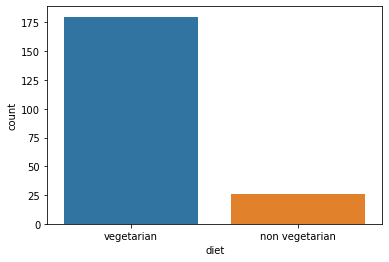

In [13]:
sns.countplot(Food_ds['diet']);

C:\Users\608729464\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


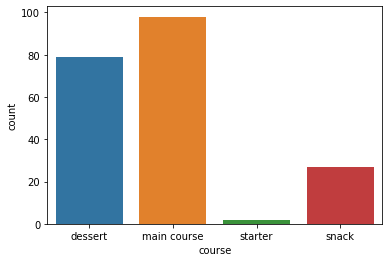

In [50]:
sns.countplot(Food_ds['course']);

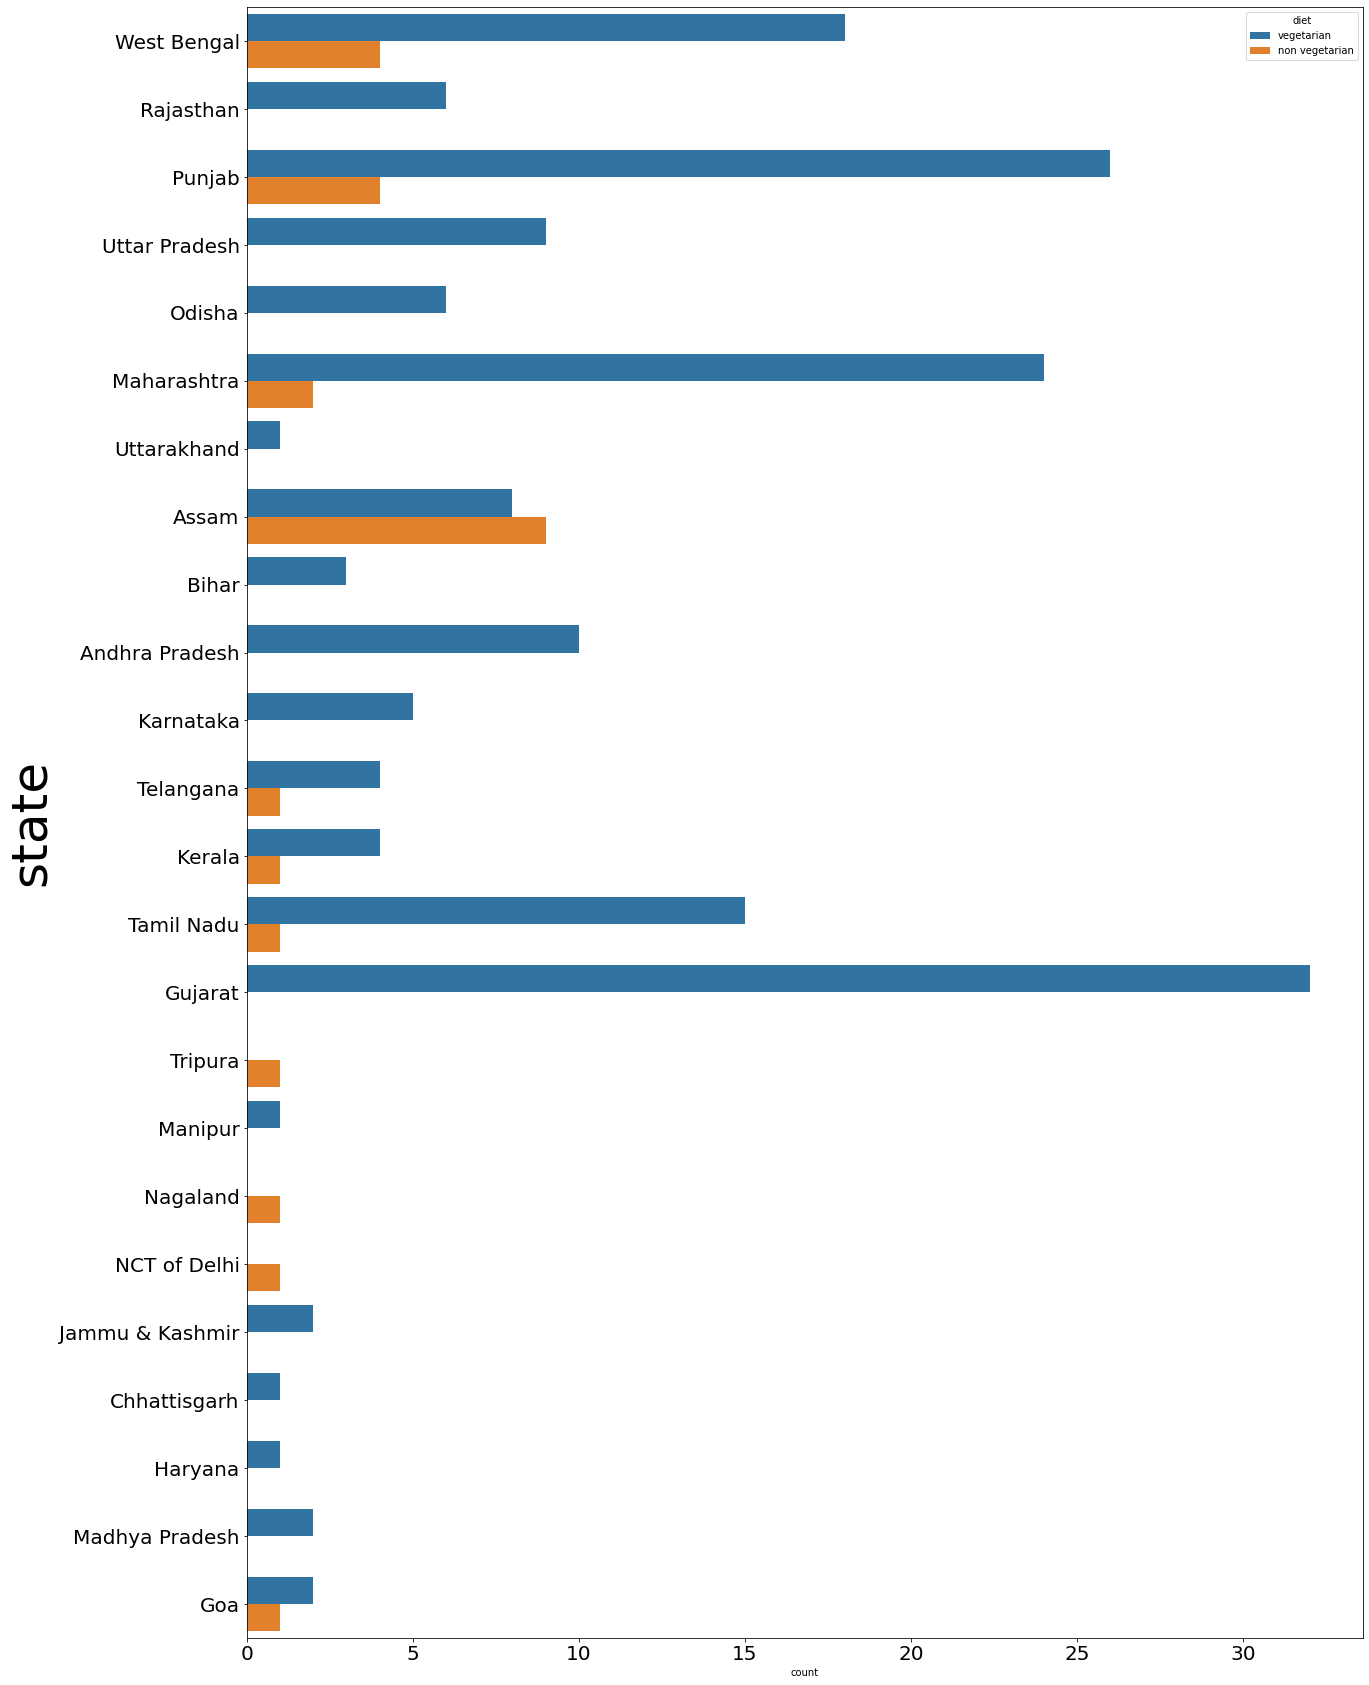

In [32]:
plt.figure(figsize=(20,30))
#plt.xlabel('x-axis', fontsize=20)
plt.ylabel('y-axis', fontsize=50)
plt.yticks(size=20)

#to increase x ticks 
plt.xticks(size=20)
sns.countplot(y=Food_ds['state'],hue=Food_ds['diet'],orient='v');

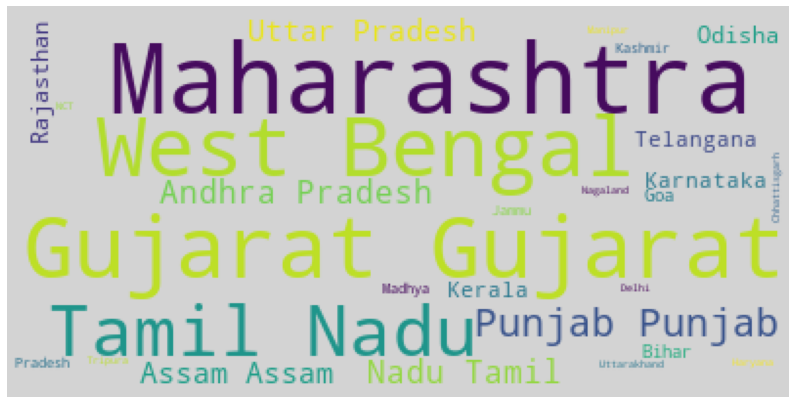

In [49]:
from wordcloud import WordCloud 

wordCloud = WordCloud(
    background_color='lightgrey',
    max_font_size = 50).generate(' '.join(Food_ds['state']))
plt.figure(figsize=(14,10))
plt.axis('off')
plt.imshow(wordCloud)
plt.show()